<a href="https://colab.research.google.com/github/lellabhaskar/Devaansh/blob/master/train1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!ls -l
# !ls

total 128
-rw-r--r-- 1 root root 125203 Apr 20 05:27 data.csv
drwxr-xr-x 1 root root   4096 Apr 20 05:27 sample_data


In [37]:
!ls

data.csv  sample_data  scaled_data.csv


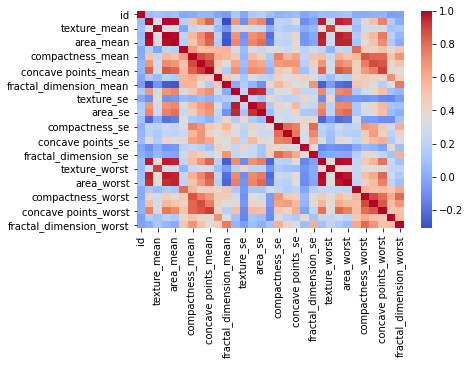

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('data.csv')
data.head()
data.tail()
crs=data.corr()
sns.heatmap(crs, cmap='coolwarm')


In [13]:
diagnosis = data.loc[:,'diagnosis']
encoding_logic = lambda val: 'red' if val=='M' else 'blue'
diagnosis_encoded = diagnosis.map(encoding_logic) # logic will be applied to EVERY element of diagnosis
diagnosis_encoded[:20]
diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [14]:
diagnosis = data.loc[:,'diagnosis']
encoding_logic = lambda val: 'red' if val=='M' else 'blue'
diagnosis_encoded = diagnosis.map(encoding_logic) # logic will be applied to EVERY element of diagnosis
inputs = data.loc[:,['id','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
inputs

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


<Figure size 432x288 with 0 Axes>

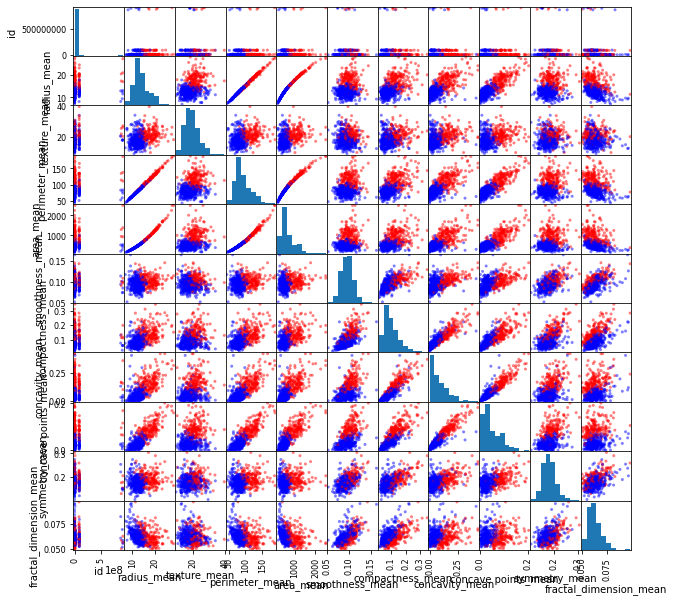

In [15]:
plt.figure() # CLEAN the graph buffer before writing anything into it 
sm = pd.plotting.scatter_matrix(inputs, c=diagnosis_encoded, figsize=(10,10))
plt.show() # not required in iPython 

In [16]:
clean_input = inputs.set_index('id')#, inplace=True)
clean_input.head() # input where INDEX is ID

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [17]:
# we'll set it to index instead
clean_input = inputs.set_index('id')#, inplace=True)
clean_input.head() # input where INDEX is ID

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


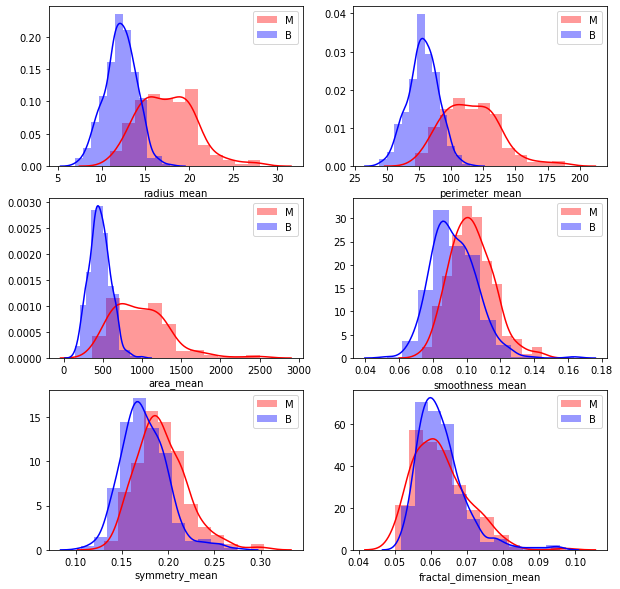

In [18]:
inputs_small = data.loc[:,['radius_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'symmetry_mean','fractal_dimension_mean'] ]
bins = 12 # relative in nature
plt.figure(figsize=(10,10))
# enumerate([a,b,c]) -> [(0,a),(1,b), (2,c)]
for i, feature in enumerate(inputs_small.columns):
  rows = 3
  cols = 2
  plt.subplot(rows,cols, i+1 )
  sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M')
  sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B')
  plt.legend(loc='upper right')
plt.show()

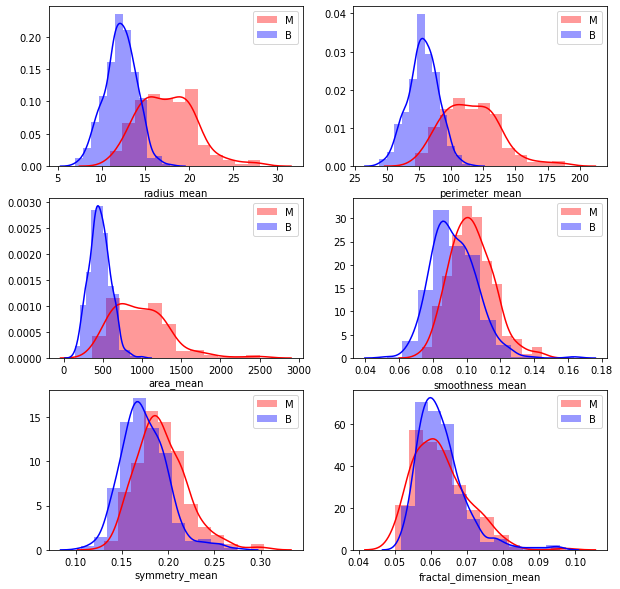

In [19]:
inputs_small = data.loc[:,['radius_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'symmetry_mean','fractal_dimension_mean'] ]
bins = 12 # relative in nature
plt.figure(figsize=(10,10))
# enumerate([a,b,c]) -> [(0,a),(1,b), (2,c)]
for i, feature in enumerate(inputs_small.columns):
  rows = 3
  cols = 2
  plt.subplot(rows,cols, i+1 )
  sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M')
  sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B')
  plt.legend(loc='upper right')
plt.show()

In [20]:
stats = inputs.describe().T
mu = stats['mean']
sigma = stats['std']
scaled_inputs = (inputs-mu)/sigma 
scaled_inputs.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,-0.236197,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764
1,-0.236196,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889
2,0.431362,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658
3,0.431741,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602
4,0.431821,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956


In [21]:
stats = inputs.describe().T
mu = stats['mean']
sigma = stats['std']
scaled_inputs = (inputs-mu)/sigma 
scaled_inputs.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,-0.236197,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764
1,-0.236196,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889
2,0.431362,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658
3,0.431741,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602
4,0.431821,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956


In [0]:
scaled_inputs.to_csv('scaled_data.csv')


In [24]:
encoding_logic = lambda value: 1 if value=='M' else 0
y = diagnosis.map(encoding_logic)
y[:20]

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
Name: diagnosis, dtype: int64

In [0]:
x = scaled_inputs

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)
# except now the seed for randomness is fixed at 42-> shuffling will be random, but always in
# the same way!!! 
print(len(xtrain))
print(len(xtest)) # this should be 20% of len(input)
print(len(ytrain))
print(len(ytest))


455
114
455
114


In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
# I need some METRICS from which i could compare these 3 algorithms and select which was better or worse
import time 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
time_all = [] # we don't want a SLOW algorithms
acc_all = [] # we want correct number of guesses
# Accuracy = Correct Guesses/ Total Guesses 
# SGD
starttime = time.time()
endtime = time.time()
timetaken  = endtime - starttime 
print('Time taken by Stochastic Gradient Descent is: ' + str(timetaken))
# FIRST RUN BLANK TIME-> to find out how much time does empty process take
time_error = 1.1682510375976562e-05

Time taken by Stochastic Gradient Descent is: 3.409385681152344e-05


In [28]:
# Let's apply our first 2 algorithms for comparison-> Stochastic Gradient Descent, SVC and LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
# I need some METRICS from which i could compare these 3 algorithms and select which was better or worse
import time 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
time_all = [] # we don't want a SLOW algorithms
acc_all = [] # we want correct number of guesses
# Accuracy = Correct Guesses/ Total Guesses 
# SGD
time_error = 1.1682510375976562e-05
starttime = time.time()
model = SGDClassifier()
# FIRST STEP is TRAINING-> PROVIDE it all training Input and it's OUTPUT 
model.fit(xtrain, ytrain)
# SECOND STEP is SCORING/TESTING -> PROVIDE it all TESTING input but NOT output
# we are expecting the model to give us predictions for comparison
predictions = model.predict(xtest)
endtime = time.time()
# THIRD STEP is EVALUATE the model -> comp
timetaken  = endtime - starttime - time_error
print('Time taken by Stochastic Gradient Descent is: ' + str(timetaken))

Time taken by Stochastic Gradient Descent is: 0.01360630989074707


In [34]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
# I need some METRICS from which i could compare these 3 algorithms and select which was better or worse
import time 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
algos = {'SGD':SGDClassifier(), 'LinearSVC':LinearSVC(), 'SVC':SVC()}
# all algos that I want to compare 
time_all = [] 
acc_all = []
time_error = 1.1682510375976562e-05
for name,algo in algos.items():
  print('Starting algo: ' + name)
  starttime = time.time()
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  endtime = time.time()
  accur = accuracy_score(predictions, ytest)
  timetaken = endtime- starttime - time_error
  print('Time taken by '+ name +' is: ' + str(timetaken))
  print('Accuracy of '+ name +' is: ' + str(accur))
  time_all.append(timetaken)
  acc_all.append(accur)

Starting algo: SGD
Time taken by SGD is: 0.007773160934448242
Accuracy of SGD is: 0.9298245614035088
Starting algo: LinearSVC
Time taken by LinearSVC is: 0.013609647750854492
Accuracy of LinearSVC is: 0.9385964912280702
Starting algo: SVC
Time taken by SVC is: 0.006315469741821289
Accuracy of SVC is: 0.9736842105263158


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [35]:
from sklearn.linear_model import SGDClassifier # gradient descent
from sklearn.svm import SVC, LinearSVC # graph
from sklearn.naive_bayes import GaussianNB # probability
from sklearn.tree import DecisionTreeClassifier # TREE based 
from sklearn.ensemble import RandomForestClassifier 
# I need some METRICS from which i could compare these 3 algorithms and select which was better or worse
import time 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

algos = {'RFPlain': RandomForestClassifier(),'RF5':RandomForestClassifier(n_estimators=5),'RF200':RandomForestClassifier(n_estimators=200), 'Dtree':DecisionTreeClassifier(),'SGD':SGDClassifier(), 'LinearSVC':LinearSVC(), 'SVC':SVC(), 'Sherlock':GaussianNB()}
# all algos that I want to compare 

time_all = [] 
acc_all = []
time_error = 1.1682510375976562e-05


for name,algo in algos.items():
  print('Starting algo: ' + name)
  starttime = time.time()
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  endtime = time.time()
  accur = accuracy_score(predictions, ytest)
  timetaken = endtime- starttime - time_error
  print('Time taken by '+ name +' is: ' + str(timetaken))
  print('Accuracy of '+ name +' is: ' + str(accur))
  time_all.append(timetaken)
  acc_all.append(accur)

Starting algo: RFPlain
Time taken by RFPlain is: 0.19919085502624512
Accuracy of RFPlain is: 0.956140350877193
Starting algo: RF5
Time taken by RF5 is: 0.015761852264404297
Accuracy of RF5 is: 0.9298245614035088
Starting algo: RF200
Time taken by RF200 is: 0.37885427474975586
Accuracy of RF200 is: 0.956140350877193
Starting algo: Dtree
Time taken by Dtree is: 0.004750728607177734
Accuracy of Dtree is: 0.9298245614035088
Starting algo: SGD
Time taken by SGD is: 0.0028467178344726562
Accuracy of SGD is: 0.9210526315789473
Starting algo: LinearSVC
Time taken by LinearSVC is: 0.011621713638305664
Accuracy of LinearSVC is: 0.9385964912280702
Starting algo: SVC
Time taken by SVC is: 0.0056574344635009766
Accuracy of SVC is: 0.9736842105263158
Starting algo: Sherlock
Time taken by Sherlock is: 0.0019462108612060547
Accuracy of Sherlock is: 0.9385964912280702


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:
import numpy as np
from sklearn.linear_model import SGDClassifier # gradient descent
from sklearn.svm import SVC, LinearSVC # graph
from sklearn.naive_bayes import GaussianNB # probability
from sklearn.tree import DecisionTreeClassifier # TREE based 
from sklearn.ensemble import RandomForestClassifier 
# I need some METRICS from which i could compare these 3 algorithms and select which was better or worse
import time 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
algos = {'RFPlain': RandomForestClassifier(),'RF5':RandomForestClassifier(n_estimators=5),'RF200':RandomForestClassifier(n_estimators=200), 'Dtree':DecisionTreeClassifier(),'SGD':SGDClassifier(), 'LinearSVC':LinearSVC(), 'SVC':SVC(), 'Sherlock':GaussianNB()}
# all algos that I want to compare 

time_all = [] 
acc_all = []
cvs_all = []
time_error = 1.1682510375976562e-05

for name,algo in algos.items():
  print('Starting algo: ' + name)
  starttime = time.time()
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  endtime = time.time()
  accur = accuracy_score(predictions, ytest)
  cv_score = cross_val_score(model,x, y, cv=5 ) # no. of cross validations 
  # Chemistry -> Titration-> burettes and pippetes-> you did each experiment at least 3 times
  # mg of Na in Na2So4 -> conducted a heat/flame exp and a titration
  # you repeat exp at least 2 more times -> 2.3 mg of NA 
  # [2.3, 2.4, 2.313] -> from various results, you will calulate AVERAGE of experiement 
  timetaken = endtime- starttime - time_error
  print('Time taken by '+ name +' is: ' + str(timetaken))
  print('Accuracy of '+ name +' is: ' + str(accur))
  print('CVS of '+ name +' is: ' )
  print(cv_score)
  time_all.append(timetaken)
  acc_all.append(accur)
  cvs_all.append(np.mean(cv_score))
# when your is too less -> your algorithm will tend to OVERFIT
# one CRITICAL (FIRST and MANDATORILY FIRST) way of fixing overfitting -> INCREASE your data


Starting algo: RFPlain
Time taken by RFPlain is: 0.19809889793395996
Accuracy of RFPlain is: 0.956140350877193
CVS of RFPlain is: 
[0.92105263 0.93859649 0.94736842 0.98245614 0.96460177]
Starting algo: RF5
Time taken by RF5 is: 0.011974334716796875
Accuracy of RF5 is: 0.9298245614035088
CVS of RF5 is: 
[0.88596491 0.9122807  0.92982456 0.96491228 0.92920354]
Starting algo: RF200
Time taken by RF200 is: 0.373889684677124
Accuracy of RF200 is: 0.956140350877193
CVS of RF200 is: 
[0.90350877 0.94736842 0.94736842 0.97368421 0.95575221]
Starting algo: Dtree
Time taken by Dtree is: 0.0046880245208740234
Accuracy of Dtree is: 0.9210526315789473
CVS of Dtree is: 
[0.49122807 0.92105263 0.90350877 0.92982456 0.9380531 ]
Starting algo: SGD
Time taken by SGD is: 0.0031435489654541016
Accuracy of SGD is: 0.956140350877193
CVS of SGD is: 
[0.89473684 0.94736842 0.92105263 0.96491228 0.92920354]
Starting algo: LinearSVC
Time taken by LinearSVC is: 0.011786937713623047
Accuracy of LinearSVC is: 0.9

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
